In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore');
from subprocess import check_output

In [8]:
import tensorflow as tf
from tensorflow.keras import models, layers

In [9]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset",
    shuffle=True,
    image_size=(256, 256),
    batch_size=32
)

Found 2062 files belonging to 10 classes.


2022-07-18 14:24:27.307950: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
class_name = dataset.class_names

In [11]:
class_name

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

2022-07-18 14:28:10.449960: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


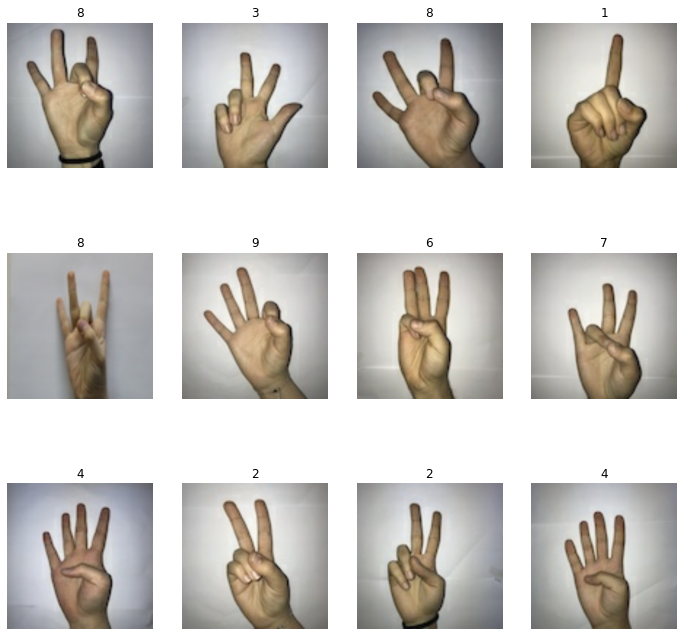

In [15]:
plt.figure(figsize=(12,12))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_name[label_batch[i]])
        plt.axis("off")

In [21]:
dataset.take(1)

<TakeDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [16]:
print(check_output(["ls", "./input"]).decode("utf8"))

X.npy



(-0.5, 63.5, 63.5, -0.5)

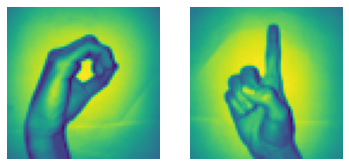

In [17]:
x_l = np.load('./input/X.npy')
y_l = class_name
img_size = 64
plt.subplot(1,2,1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

In [18]:
X = np.concatenate((x_l[204:409], x_l[822:1027]), axis=0)
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z,o), axis=0).reshape(X.shape[0], 1)
print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

In [ ]:
X_train_flatten = X_train.reshape(number_of_train, X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test.reshape(number_of_test, X_test.shape[1]*X_test.shape[2])
print("X train flatten : ", X_train_flatten.shape)